In [2]:
import pandas as pd
import numpy as np
import glob

import seaborn as sns


In [3]:
features = pd.DataFrame()

for filepath in glob.iglob('safety/features/*.csv'):
    feature_file = pd.read_csv(filepath)
    features = pd.concat([features, feature_file])

    
#features0 = pd.read_csv('safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')

In [4]:
labels= pd.read_csv('safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

In [5]:
labels.bookingID.unique().shape

(20000,)

In [17]:
features.bookingID.unique().shape

(20000,)

In [19]:
labels.label.value_counts()

0    15017
1     5001
Name: label, dtype: int64

In [6]:
features.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


### Data Cleaning
Remove bookingID with 2 labels

In [6]:
label_agg = labels.groupby('bookingID')['label'].agg(['min','max'])
dup_id = label_agg[label_agg['min'] != label_agg['max']].index.tolist()

features = features[~features.bookingID.isin(dup_id)]
labels = labels[~labels.bookingID.isin(dup_id)]

print(features.shape)
print(labels.shape)

(16116704, 11)
(19982, 2)


Check on missing value - no missing value

In [7]:
features.isnull().values.any()

False

Check on column 'second' - note that the trip records may not be continuous

In [8]:
features_agg = features.groupby('bookingID')['second'].agg(['min','max','count'])
features_agg['perc_max'] = features_agg['count'] / (features_agg['max'] + 1)

print('max value of max')
print(max(features_agg['max']))
print('max value of count')
print(max(features_agg['count']))

max value of max
1495796757.0
max value of count
7561


In [9]:
features_agg['perc_max'].describe()

count    1.998200e+04
mean     8.904283e-01
std      1.613016e-01
min      2.219553e-07
25%      8.235294e-01
50%      9.805556e-01
75%      9.993943e-01
max      1.000000e+00
Name: perc_max, dtype: float64

In [21]:
features2 = features[features['second'] < 10000].copy()

features2_agg = features2.groupby('bookingID')['second'].agg(['min','max','count'])
features2_agg['perc_max'] = features2_agg['count'] / (features2_agg['max'] + 1)

#features2_agg[features2_agg['max'] > 3600]

features2_agg.shape

(19982, 4)

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
features_agg[features_agg['max'] > 3600]

,min,max,count,perc_max
bookingID,,,,
34359738469,0.00,4305.00,4302,1.00
60129542174,0.00,3688.00,434,0.12
438086664371,0.00,8235.00,7561,0.92
446676598842,0.00,3614.00,259,0.07
446676598869,0.00,5988.00,542,0.09
532575944853,0.00,7355.00,135,0.02
747324309632,0.00,3689.00,3674,1.00
833223655429,0.00,3928.00,2696,0.69
858993459333,0.00,619315993.00,504,0.00


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

features_agg[features_agg['max'] > 3600]

In [16]:
features[(features['bookingID'] == 1108101562401)].sort_values('second')

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
1606348,1108101562401,5.50,47.00,-0.63,8.47,4.73,-0.16,0.31,0.06,0.00,2.43
551091,1108101562401,6.69,21.00,0.99,8.18,5.83,0.09,0.16,0.37,1.00,3.21
419216,1108101562401,12.33,10.00,0.22,8.53,4.38,-0.16,0.25,0.03,2.00,4.12
310392,1108101562401,13.42,10.00,-0.29,8.30,4.67,0.09,0.18,0.06,3.00,4.71
1503474,1108101562401,12.33,7.00,0.28,7.92,3.28,0.20,0.28,0.11,4.00,4.63
1292898,1108101562401,5.47,13.00,-0.37,8.56,4.55,0.12,-0.09,-0.08,5.00,3.82
279266,1108101562401,5.35,14.00,0.38,8.57,5.94,0.22,0.15,0.01,6.00,3.07
136823,1108101562401,4.38,359.00,0.11,8.12,5.83,-0.06,-0.05,0.31,7.00,1.61
387744,1108101562401,3.88,332.00,0.13,8.66,5.07,0.16,0.05,-0.05,8.00,0.53
813324,1108101562401,3.63,312.00,-0.05,8.62,4.85,-0.03,-0.06,0.03,9.00,0.64


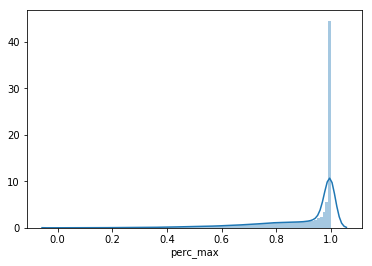

In [11]:
sns.distplot(features_agg['perc_max'], bins=100 )

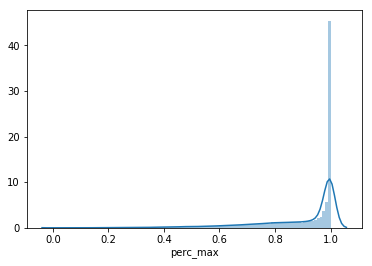

In [22]:
sns.distplot(features2_agg['perc_max'], bins=100 )

In [23]:
features.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07
mean,8.184342e+11,1.161327e+01,1.689596e+02,6.897958e-02,4.473604e+00,8.958685e-01,-1.708257e-03,2.938396e-04,-2.601239e-04,3.807072e+03,9.006461e+00
std,4.951572e+11,8.696429e+01,1.072970e+02,1.424623e+00,8.128499e+00,3.250204e+00,1.446192e-01,3.402431e-01,1.481542e-01,1.437527e+06,8.106538e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.084229e-01,-1.932755e+00,-9.298957e-01,-2.679162e-02,-2.993423e-02,-1.876969e-02,2.410000e+02,1.020000e+00
50%,8.074539e+11,4.244000e+00,1.687888e+02,6.120300e-02,9.082404e+00,7.769897e-01,-6.420414e-04,2.663161e-04,-3.726278e-05,5.200000e+02,7.530000e+00
75%,1.254130e+12,8.000000e+00,2.629526e+02,6.347809e-01,9.709925e+00,2.751175e+00,2.331571e-02,3.144551e-02,1.823425e-02,8.620000e+02,1.548000e+01
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02


Check on speed < 0

In [24]:
print("number of booking ID with speed < 0")
print(features2[features2['Speed'] < 0].bookingID.unique().shape)

number of booking ID with speed < 0
(8647,)


In [25]:
neg_speed_count = features2[features2['Speed'] < 0].groupby('bookingID')['Speed'].agg('count')
features2_agg2 = pd.concat([neg_speed_count, features2_agg['count']], axis = 1, join = 'inner')

features2_agg2['perc_neg'] = features2_agg2['Speed'] / features2_agg2['count']
features2_agg2.describe()

,Speed,count,perc_neg
count,8647.00,8647.00,8647.00
mean,27.75,886.78,0.03
std,90.36,447.30,0.09
min,1.00,120.00,0.00
25%,2.00,550.00,0.00
50%,7.00,839.00,0.01
75%,18.00,1169.00,0.02
max,2582.00,7561.00,1.00


In [33]:
# records with negative speed - perc < 10% & abs count of 30 or less
# infer the record based previous value and later value
id_to_compute = features2_agg2[(features2_agg2['perc_neg'] <= 0.1) & (features2_agg2['Speed'] <= 30)].index.tolist()



In [31]:
features2[(features2['bookingID'] == 1709396983925)].sort_values('second')

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
1215659,1709396983925,3.00,317.00,0.34,9.79,0.18,0.03,-0.01,-0.00,0.00,0.00
1383018,1709396983925,3.00,317.00,-0.03,9.88,0.45,0.01,0.02,-0.01,1.00,0.00
1332823,1709396983925,3.00,317.00,0.16,9.96,0.25,-0.01,0.03,-0.01,2.00,0.00
740056,1709396983925,3.00,317.00,0.26,9.88,-0.19,0.03,-0.01,0.00,3.00,0.00
307731,1709396983925,3.00,317.00,0.11,10.05,0.33,-0.02,-0.00,0.01,4.00,0.00
1005649,1709396983925,3.00,317.00,0.09,9.79,-0.32,-0.00,0.00,0.00,5.00,0.00
824469,1709396983925,3.00,317.00,0.01,10.02,1.91,0.02,0.01,-0.01,6.00,0.00
1018811,1709396983925,3.00,317.00,-0.26,9.81,-0.33,0.00,-0.01,-0.00,7.00,0.00
1127858,1709396983925,3.00,317.00,-0.01,9.99,0.02,0.02,0.03,-0.02,8.00,0.00
1528440,1709396983925,3.00,317.00,-0.04,9.99,-0.05,0.02,0.00,-0.01,9.00,0.00


In [59]:
features[(features['bookingID'] == 25769803882) & (features['Speed'] < 0)].sort_values('second')

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
542712,25769803882,48.0,70.944664,-0.025122,-11.020215,-0.042319,-0.246595,0.010147,0.024112,256.0,-1.0
72121,25769803882,48.0,68.907349,0.591266,-8.850595,0.302661,0.014680,0.034382,0.022557,257.0,-1.0
1455668,25769803882,48.0,66.857834,0.678595,-9.888675,-0.922339,0.206970,0.084766,-0.083425,258.0,-1.0
1125994,25769803882,48.0,64.749825,-0.168079,-10.719348,-0.127405,0.009632,0.143960,-0.062901,259.0,-1.0
615450,25769803882,48.0,62.617905,1.221561,-10.191635,-0.315521,0.047119,-0.040800,0.050259,260.0,-1.0
346468,25769803882,48.0,61.586071,0.188266,-9.553265,-0.099741,0.092227,0.013790,-0.001669,261.0,-1.0
198032,25769803882,48.0,61.586071,0.989331,-10.480389,0.676501,-0.056674,-0.079958,0.032439,262.0,-1.0
339275,25769803882,48.0,60.558235,1.047351,-9.680670,0.563602,-0.015563,-0.084521,0.055721,263.0,-1.0
495340,25769803882,48.0,60.558235,-0.058768,-10.188046,0.369653,-0.073345,0.005532,-0.011399,264.0,-1.0
784750,25769803882,49.0,59.538742,1.078754,-9.979892,0.507077,0.027575,-0.059338,0.053495,265.0,-1.0


In [25]:
features_agg2 = features.groupby('bookingID').agg(['min','max'])

features_agg2.columns = pd.Index([e[0] + "_" + e[1] for e in features_agg2.columns.tolist()])
features_agg2.head()



,Accuracy_min,Accuracy_max,Bearing_min,Bearing_max,acceleration_x_min,acceleration_x_max,acceleration_y_min,acceleration_y_max,acceleration_z_min,acceleration_z_max,gyro_x_min,gyro_x_max,gyro_y_min,gyro_y_max,gyro_z_min,gyro_z_max,second_min,second_max,Speed_min,Speed_max
bookingID,,,,,,,,,,,,,,,,,,,,
0,4.0,48.000,0.037464,359.979767,-4.692294,4.782614,-12.764703,-6.119916,-6.251807,2.318857,-0.392537,0.438371,-0.609930,0.469724,-0.731892,0.372807,0.0,1589.0,-1.0,22.946083
1,3.0,7.709,0.000000,337.000000,-5.352994,3.813341,6.623425,12.536156,-5.355455,1.481293,-0.125367,0.126536,-0.678183,0.470837,-0.121265,0.235131,0.0,1034.0,-1.0,21.882141
2,3.0,8.000,1.000000,354.000000,-2.971295,1.956122,7.941810,13.333716,-3.282551,2.312870,-0.155218,0.282162,-0.462000,0.431695,-0.125907,0.255884,0.0,825.0,0.0,9.360483
4,10.0,10.000,2.271227,353.855377,-2.866458,2.019635,-18.847833,-7.064984,-9.374869,0.296381,-0.420507,0.438732,-0.506531,0.652628,-0.348189,0.505220,0.0,1094.0,0.0,19.780001
6,3.0,12.000,0.000000,359.000000,-4.352792,5.593026,6.469330,13.249917,-2.140482,7.977724,-0.253551,0.362202,-0.621802,0.532123,-0.348345,0.364534,0.0,1094.0,0.0,16.394695


In [26]:
combined = features_agg2.join(labels.set_index('bookingID'))
combined.head()

,Accuracy_min,Accuracy_max,Bearing_min,Bearing_max,acceleration_x_min,acceleration_x_max,acceleration_y_min,acceleration_y_max,acceleration_z_min,acceleration_z_max,...,gyro_x_max,gyro_y_min,gyro_y_max,gyro_z_min,gyro_z_max,second_min,second_max,Speed_min,Speed_max,label
bookingID,,,,,,,,,,,,,,,,,,,,,
0,4.0,48.000,0.037464,359.979767,-4.692294,4.782614,-12.764703,-6.119916,-6.251807,2.318857,...,0.438371,-0.609930,0.469724,-0.731892,0.372807,0.0,1589.0,-1.0,22.946083,0
1,3.0,7.709,0.000000,337.000000,-5.352994,3.813341,6.623425,12.536156,-5.355455,1.481293,...,0.126536,-0.678183,0.470837,-0.121265,0.235131,0.0,1034.0,-1.0,21.882141,1
2,3.0,8.000,1.000000,354.000000,-2.971295,1.956122,7.941810,13.333716,-3.282551,2.312870,...,0.282162,-0.462000,0.431695,-0.125907,0.255884,0.0,825.0,0.0,9.360483,1
4,10.0,10.000,2.271227,353.855377,-2.866458,2.019635,-18.847833,-7.064984,-9.374869,0.296381,...,0.438732,-0.506531,0.652628,-0.348189,0.505220,0.0,1094.0,0.0,19.780001,1
6,3.0,12.000,0.000000,359.000000,-4.352792,5.593026,6.469330,13.249917,-2.140482,7.977724,...,0.362202,-0.621802,0.532123,-0.348345,0.364534,0.0,1094.0,0.0,16.394695,0


In [46]:
data1 = Histogram(x=combined.loc[combined['label'] == 1,'acceleration_x_max'])
data0 = Histogram(x=combined.loc[combined['label'] == 0,'acceleration_x_max'])

data = [data1, data0]

layout = Layout(barmode='overlay')
fig = Figure(data=data, layout=layout)


iplot(data)  